#Project Description

How do small changes in a student's daily activity (steps) and overnight sleep affect their next-day focus and energy levels? We want to find the perfect "sweet spot" for sleep and steps that maximize a student's daily energy.


#This code block serves two main purposes: first, to mount Google Drive, and second, to load a CSV file into a pandas DataFrame.

In [ ]:
#1. Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/fbdap final.csv')

In [ ]:
display(df.head())

,Steps per Day,Name (Person),Date of Response,Sleep duration last night,Sleep Quality,Woke Up During Night,Energy Level,Focus Level,Mood Rating,Anxiety/Stress Level,Daytime Sleepiness,Reason for Low/High Energy
0,2355.0,Person 6,03-11-2025,5.0,2.0,Yes,2.0,2.0,Somewhat negative,4.0,Frequently,Low sleep and very low activity.
1,2976.0,Person 2,03-11-2025,5.5,2.0,Yes,2.0,2.0,Somewhat positive,4.0,Frequently,Low sleep
2,2895.0,Person 6,04-11-2025,6.0,3.0,Yes,3.0,3.0,Neutral,3.0,A little,Moderate sleep but low step count
3,4283.0,Person 2,04-11-2025,6.0,3.0,Yes,3.0,3.0,Neutral,3.0,A little,Moderate sleep but low step count
4,4508.0,Person 6,05-11-2025,7.0,3.0,No,4.0,4.0,Somewhat positive,2.0,A little,Good sleep and moderate steps improved focus


# Encoding
Encode the 'Woke Up During Night' column from 'Yes'/'No' to 1/0, map 'Daytime Sleepiness' from 'Frequently'/'A little'/'Never' to 2/1/0, and create a new binary column 'Sleep Goal Met (7h)' which is 1 if 'Sleep duration last night' is 7 or more hours, and 0 otherwise, all within the `df_cleaned` DataFrame.

In [ ]:
print("Data types of df_cleaned columns:\n", df_cleaned.dtypes)

object_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

columns_to_exclude = ['Name (Person)', 'Reason for Low/High Energy']

categorical_columns_for_encoding = [col for col in object_columns if col not in columns_to_exclude]

print("\nCategorical columns suitable for encoding (excluding 'Name (Person)' and 'Reason for Low/High Energy'):")
for col in categorical_columns_for_encoding:
    print(col)


Data types of df_cleaned columns:
 Steps per Day                 float64
Name (Person)                  object
Date of Response               object
Sleep duration last night     float64
Sleep Quality                 float64
Woke Up During Night           object
Energy Level                  float64
Focus Level                   float64
Mood Rating                    object
Anxiety/Stress Level          float64
Daytime Sleepiness             object
Reason for Low/High Energy     object
Did Not Meet Sleep Goal         int64
Mood Rating Numeric             int64
dtype: object

Categorical columns suitable for encoding (excluding 'Name (Person)' and 'Reason for Low/High Energy'):
Date of Response
Woke Up During Night
Mood Rating
Daytime Sleepiness


In [ ]:
df_cleaned['Woke Up During Night'] = df_cleaned['Woke Up During Night'].map({'Yes': 1, 'No': 0})
print("Encoded 'Woke Up During Night' column:")
print(df_cleaned['Woke Up During Night'].value_counts())

Encoded 'Woke Up During Night' column:
Woke Up During Night
1    48
0    36
Name: count, dtype: int64


In [ ]:
df_cleaned['Daytime Sleepiness'] = df_cleaned['Daytime Sleepiness'].map({'Frequently': 2, 'A little': 1, 'Never': 0})
print("Encoded 'Daytime Sleepiness' column:")
print(df_cleaned['Daytime Sleepiness'].value_counts())

Encoded 'Daytime Sleepiness' column:
Daytime Sleepiness
1.0    51
2.0    17
Name: count, dtype: int64


In [ ]:
df_cleaned['Sleep Goal Met (7h)'] = (df_cleaned['Sleep duration last night'] >= 7).astype(int)
print("Created 'Sleep Goal Met (7h)' column:")
print(df_cleaned['Sleep Goal Met (7h)'].value_counts())

Created 'Sleep Goal Met (7h)' column:
Sleep Goal Met (7h)
0    48
1    36
Name: count, dtype: int64


# RELATION AND FUNCTIONS-This code block performs a linear regression analysis to determine the relationship between 'Steps per Day' and 'Energy Level'

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df_sleep = df[['Sleep duration last night', 'Energy Level']].dropna()

X_sleep = df_sleep[['Sleep duration last night']]
y_energy_sleep = df_sleep['Energy Level']

model_sleep = LinearRegression()
model_sleep.fit(X_sleep, y_energy_sleep)

intercept_sleep = model_sleep.intercept_
slope_sleep = model_sleep.coef_[0]

print(f"Linear Regression Model for Sleep Duration and Energy Level:")
print(f"Intercept: {intercept_sleep:.4f}")
print(f"Slope: {slope_sleep:.4f}")
print(f"Equation: Energy Level = {intercept_sleep:.4f} + ({slope_sleep:.4f} * Sleep Duration)")

Linear Regression Model for Sleep Duration and Energy Level:
Intercept: -3.1905
Slope: 1.0421
Equation: Energy Level = -3.1905 + (1.0421 * Sleep Duration)


#This code block is designed to visualize the relationship between 'Sleep duration last night' and 'Energy Level'

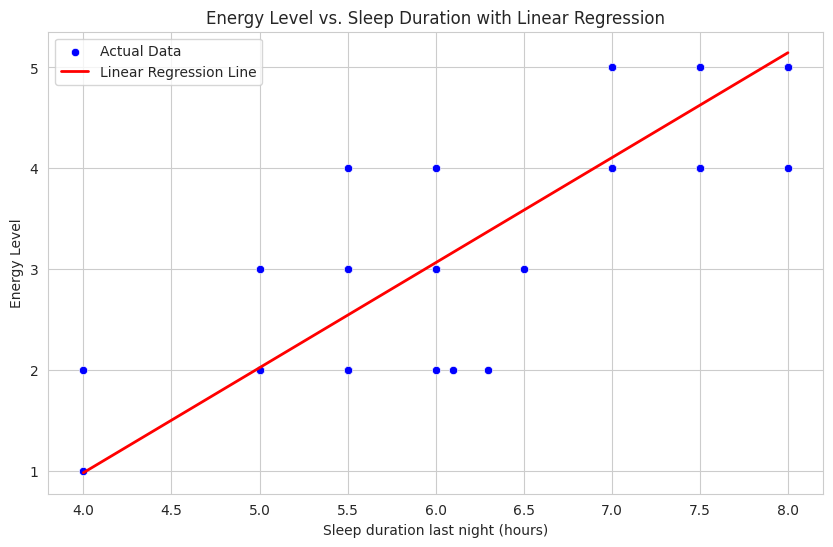

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure df_sleep, intercept_sleep, and slope_sleep are defined from previous steps
# If not, you may need to re-run the previous linear regression model cell.

plt.figure(figsize=(10, 6))

# Plot actual data points
sns.scatterplot(x=df_sleep['Sleep duration last night'], y=df_sleep['Energy Level'], color='blue', label='Actual Data')

# Plot the linear regression line
# Create a range of sleep duration values for the regression line
sleep_range = np.linspace(df_sleep['Sleep duration last night'].min(), df_sleep['Sleep duration last night'].max(), 100)
predicted_energy_line = intercept_sleep + slope_sleep * sleep_range
plt.plot(sleep_range, predicted_energy_line, color='red', linewidth=2, label='Linear Regression Line')

plt.title('Energy Level vs. Sleep Duration with Linear Regression')
plt.xlabel('Sleep duration last night (hours)')
plt.ylabel('Energy Level')
plt.legend()
plt.grid(True)
plt.show()


#Train a polynomial regression model to predict 'Energy Level' based on 'Steps per Day' using `df_cleaned`, and then visualize the relationship between 'Steps per Day' and 'Energy Level' with a scatter plot, overlaying the polynomial regression function line.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Filter the df_cleaned DataFrame to include only rows where both 'Steps per Day' and 'Energy Level' are not NaN.
df_for_poly_plot = df_cleaned.dropna(subset=['Steps per Day', 'Energy Level']).copy()

# 2. Extract 'Steps per Day' as the feature (X) and 'Energy Level' as the target (y).
X = df_for_poly_plot[['Steps per Day']].values
y = df_for_poly_plot['Energy Level'].values

# 4. Initialize a PolynomialFeatures object with a suitable degree (e.g., degree=2).
poly_features = PolynomialFeatures(degree=2)

# 5. Transform the 'Steps per Day' feature (X) using the fit_transform method.
X_poly = poly_features.fit_transform(X)

# 6. Initialize a LinearRegression model.
poly_model = LinearRegression()

# 7. Fit the poly_model to the X_poly features and the 'Energy Level' target (y).
poly_model.fit(X_poly, y)

# 8. Use the trained poly_model to predict 'Energy Level' based on X_poly and store these predictions.
df_for_poly_plot['Predicted Energy'] = poly_model.predict(X_poly)

print("Polynomial regression model trained and predictions added to df_for_poly_plot.")
display(df_for_poly_plot.head())

Polynomial regression model trained and predictions added to df_for_poly_plot.


,Steps per Day,Name (Person),Date of Response,Sleep duration last night,Sleep Quality,Woke Up During Night,Energy Level,Focus Level,Mood Rating,Anxiety/Stress Level,Daytime Sleepiness,Reason for Low/High Energy,Sleep Goal Met (7h),Predicted Energy
0,2355.0,Person 6,03-11-2025,5.0,2.0,1.0,2.0,2.0,Somewhat negative,4.0,2.0,Low sleep and very low activity.,0,2.206588
1,2976.0,Person 2,03-11-2025,5.5,2.0,1.0,2.0,2.0,Somewhat positive,4.0,2.0,Low sleep,0,2.574890
2,2895.0,Person 6,04-11-2025,6.0,3.0,1.0,3.0,3.0,Neutral,3.0,1.0,Moderate sleep but low step count,0,2.528646
3,4283.0,Person 2,04-11-2025,6.0,3.0,1.0,3.0,3.0,Neutral,3.0,1.0,Moderate sleep but low step count,0,3.246627
4,4508.0,Person 6,05-11-2025,7.0,3.0,0.0,4.0,4.0,Somewhat positive,2.0,1.0,Good sleep and moderate steps improved focus,1,3.348120


#This code block generates a visualization that shows the relationship between 'Steps per Day' and 'Energy Level', specifically highlighting how well our previously trained polynomial regression model fits this relationship.

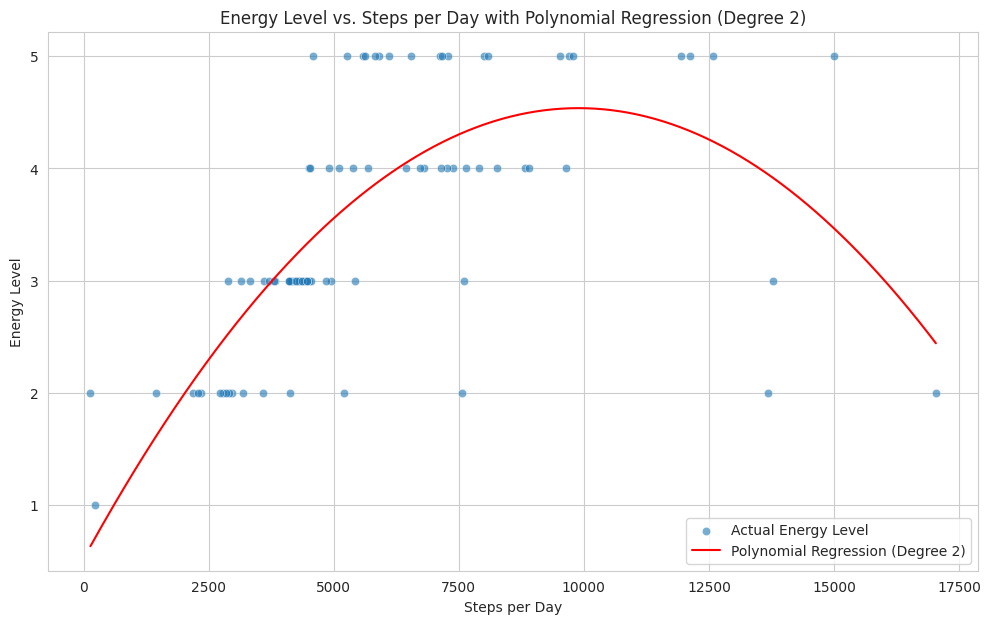

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Scatter plot of actual data points
sns.scatterplot(x='Steps per Day', y='Energy Level', data=df_for_poly_plot, label='Actual Energy Level', alpha=0.6)

# Plot the polynomial regression line
# Create a range of Steps per Day values for a smooth curve
steps_range = np.linspace(df_for_poly_plot['Steps per Day'].min(), df_for_poly_plot['Steps per Day'].max(), 500).reshape(-1, 1)
steps_range_poly = poly_features.transform(steps_range)
predicted_energy_range = poly_model.predict(steps_range_poly)

plt.plot(steps_range, predicted_energy_range, color='red', label='Polynomial Regression (Degree 2)')

plt.title('Energy Level vs. Steps per Day with Polynomial Regression (Degree 2)')
plt.xlabel('Steps per Day')
plt.ylabel('Energy Level')
plt.legend()
plt.grid(True)
plt.show()

#This code block is designed to analyze and visualize the relationship between achieving a 7-hour sleep goal and an individual's average anxiety/stress level. It performs two main actions: first, it calculates the average stress level for those who met and those who did not meet their sleep goal, and second, it presents this relationship both numerically and graphically using a bar chart.


RELATION: Sleep Goal Met (7h) vs Average Stress Level
   Sleep Goal Met (7h)  Avg_Stress_Level
0                    0          3.229167
1                    1          2.388889


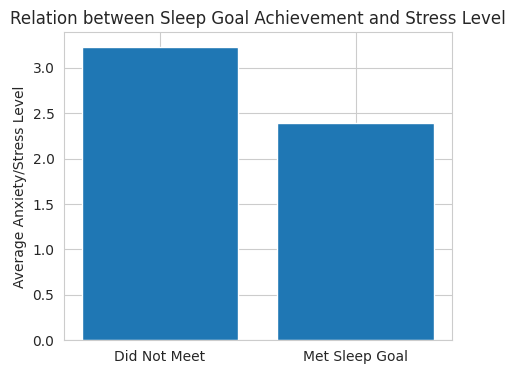

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

stress_relation = (
    df_cleaned.groupby('Sleep Goal Met (7h)')['Anxiety/Stress Level']
      .mean()
      .reset_index()
)
stress_relation.columns = ['Sleep Goal Met (7h)', 'Avg_Stress_Level']

print("\nRELATION: Sleep Goal Met (7h) vs Average Stress Level")
print(stress_relation)

plt.figure(figsize=(5,4))
plt.bar(stress_relation['Sleep Goal Met (7h)'],
        stress_relation['Avg_Stress_Level'])
plt.xticks([0, 1], ['Did Not Meet', 'Met Sleep Goal'])
plt.ylabel("Average Anxiety/Stress Level")
plt.title("Relation between Sleep Goal Achievement and Stress Level")
plt.show()

#This code block analyzes and visualizes the relationship between achieving a 7-hour sleep goal and an individual's average mood score. It first ensures that the 'Mood Rating' is converted into a numerical format, then calculates the average mood score for those who met their sleep goal versus those who did not, and finally presents these findings both numerically and graphically.


RELATION: Sleep Goal Met (7h) vs Average Mood Score
   Sleep Goal Met (7h)  Avg_Mood_Score
0                    0        2.770833
1                    1        4.083333


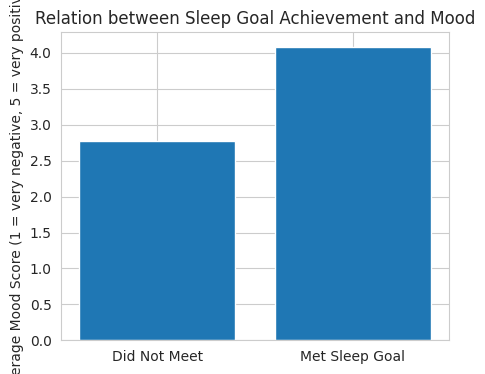

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define mood mapping if it's not already globally defined or to ensure it's available
mood_mapping = {
    'Very negative': 1,
    'Somewhat negative': 2,
    'Neutral': 3,
    'Somewhat positive': 4,
    'Very positive': 5
}

# Ensure 'Mood Rating Numeric' column is created in df_cleaned
df_cleaned['Mood Rating Numeric'] = df_cleaned['Mood Rating'].map(mood_mapping)

mood_relation = (
    df_cleaned.groupby('Sleep Goal Met (7h)')['Mood Rating Numeric']
      .mean()
      .reset_index()
)
mood_relation.columns = ['Sleep Goal Met (7h)', 'Avg_Mood_Score']

print("\nRELATION: Sleep Goal Met (7h) vs Average Mood Score")
print(mood_relation)

plt.figure(figsize=(5,4))
plt.bar(mood_relation['Sleep Goal Met (7h)'],
        mood_relation['Avg_Mood_Score'])
plt.xticks([0, 1], ['Did Not Meet', 'Met Sleep Goal']) # Adjusted labels for clarity
plt.ylabel("Average Mood Score (1 = very negative, 5 = very positive)")
plt.title("Relation between Sleep Goal Achievement and Mood")
plt.show()

#This code block calculates the Pearson correlation coefficient between two specific columns: 'Sleep duration last night' and 'Energy Level' from your DataFrame df.

In [ ]:
corr_sleep_energy = df['Sleep duration last night'].corr(df['Energy Level'])
print("Correlation (Sleep ↔ Energy):", corr_sleep_energy)

Correlation (Sleep ↔ Energy): 0.8686895836197883


#This code block is designed to visualize the relationship between 'Sleep duration last night' and 'Energy Level', and specifically to overlay the linear regression line we previously calculated.

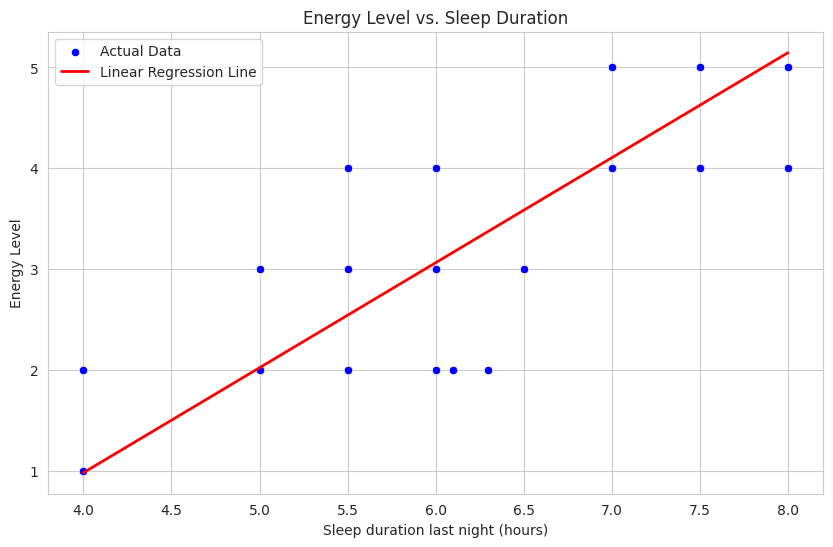

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure df_sleep, intercept_sleep, and slope_sleep are defined from previous steps
# If not, please run the linear regression model cell for sleep duration vs energy level.

plt.figure(figsize=(10, 6))

# Plot actual data points
sns.scatterplot(x=df_sleep['Sleep duration last night'], y=df_sleep['Energy Level'], color='blue', label='Actual Data')

# Plot the linear regression line
sleep_range = np.linspace(df_sleep['Sleep duration last night'].min(), df_sleep['Sleep duration last night'].max(), 100)
predicted_energy_line = intercept_sleep + slope_sleep * sleep_range
plt.plot(sleep_range, predicted_energy_line, color='red', linewidth=2, label='Linear Regression Line')

plt.title('Energy Level vs. Sleep Duration')
plt.xlabel('Sleep duration last night (hours)')
plt.ylabel('Energy Level')
plt.legend()
plt.grid(True)
plt.show()

#This code block is designed to analyze and visualize the relationship between achieving a 7-hour sleep goal and an individual's average sleep quality. It first calculates the average sleep quality for those who met their sleep goal versus those who did not, and then presents these findings both numerically and graphically


RELATION: Sleep Goal Met (7h) vs Average Sleep Quality
   Sleep Goal Met (7h)  Avg_Sleep_Quality
0                    0           2.666667
1                    1           4.277778


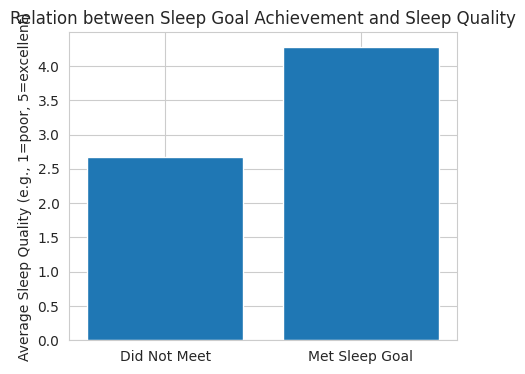

In [ ]:
import pandas as pd

# Assuming df_cleaned is already defined and contains 'Sleep Quality' and 'Sleep Goal Met (7h)'
# 'Sleep Quality' is already numeric (float64) in df_cleaned, so no mapping is needed here.

relation_sleepqual_goal = (
    df_cleaned.groupby('Sleep Goal Met (7h)')['Sleep Quality']
      .mean()
      .reset_index()
)
relation_sleepqual_goal.columns = ['Sleep Goal Met (7h)', 'Avg_Sleep_Quality']

print("\nRELATION: Sleep Goal Met (7h) vs Average Sleep Quality")
print(relation_sleepqual_goal)

plt.figure(figsize=(5,4))
plt.bar(relation_sleepqual_goal['Sleep Goal Met (7h)'],
        relation_sleepqual_goal['Avg_Sleep_Quality'])
plt.xticks([0, 1], ['Did Not Meet', 'Met Sleep Goal']) # Adjusted labels for clarity
plt.ylabel("Average Sleep Quality (e.g., 1=poor, 5=excellent)")
plt.title("Relation between Sleep Goal Achievement and Sleep Quality")
plt.show()

#This code block calculates the Pearson correlation coefficient between two specific numerical columns: 'Steps per Day' and 'Mood Rating Numeric' from your df_cleaned DataFrame.

In [ ]:
corr_steps_mood = df_cleaned['Steps per Day'].corr(df_cleaned['Mood Rating Numeric'])
print("Correlation (Steps ↔ Mood):", corr_steps_mood)

Correlation (Steps ↔ Mood): 0.4380535775116264


#This code block generates a scatter plot to visualize the relationship between 'Steps per Day' and 'Mood Rating Numeric' from your df_cleaned DataFrame.

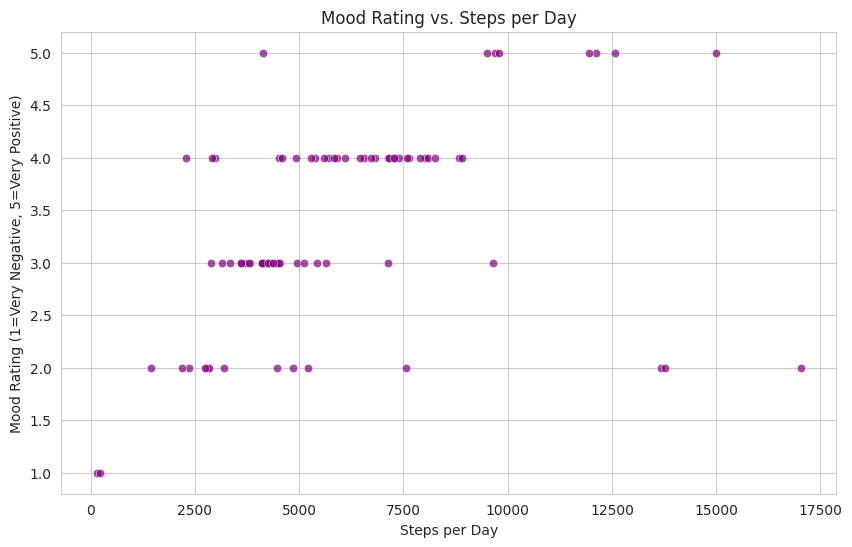

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Steps per Day'], y=df_cleaned['Mood Rating Numeric'], color='purple', alpha=0.7)
plt.title('Mood Rating vs. Steps per Day')
plt.xlabel('Steps per Day')
plt.ylabel('Mood Rating (1=Very Negative, 5=Very Positive)')
plt.grid(True)
plt.show()

#This code block calculates the Pearson correlation coefficient between two specific numerical columns: 'Steps per Day' and 'Anxiety/Stress Level' from your df_cleaned DataFrame.

In [ ]:
corr_steps_stress = df_cleaned['Steps per Day'].corr(df_cleaned['Anxiety/Stress Level'])
print("Correlation (Steps ↔ Stress):", corr_steps_stress)

Correlation (Steps ↔ Stress): -0.2898890307371717


#This code block generates a scatter plot to visualize the relationship between 'Steps per Day' and 'Anxiety/Stress Level' from your df_cleaned DataFrame. It helps you see if there's any pattern or trend between these two variables.

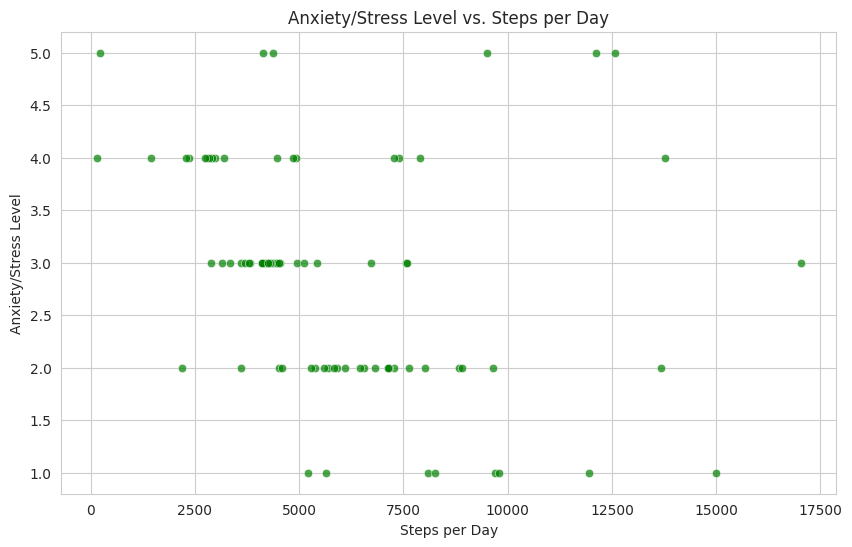

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Steps per Day'], y=df_cleaned['Anxiety/Stress Level'], color='green', alpha=0.7)
plt.title('Anxiety/Stress Level vs. Steps per Day')
plt.xlabel('Steps per Day')
plt.ylabel('Anxiety/Stress Level')
plt.grid(True)
plt.show()

#This code block calculates the Pearson correlation coefficients between a specific set of numerical variables in df DataFrame and then displays the resulting correlation matrix.

In [ ]:
# ASSOCIATION (Correlation Strength)
corr = df[['Steps per Day', 'Sleep duration last night',
             'Energy Level', 'Focus Level']].corr()

corr

,Steps per Day,Sleep duration last night,Energy Level,Focus Level
Steps per Day,1.000000,0.611937,0.492642,0.490829
Sleep duration last night,0.611937,1.000000,0.868690,0.815050
Energy Level,0.492642,0.868690,1.000000,0.925537
Focus Level,0.490829,0.815050,0.925537,1.000000


#This set of code blocks generates various distinct scatter plots, each visualizing the relationship between two specific variables from your df DataFrame. They are designed to show how 'Energy Level' is related to 'Steps per Day', how 'Energy Level' is related to 'Sleep duration last night', and how 'Focus Level' is related to 'Steps per Day'.


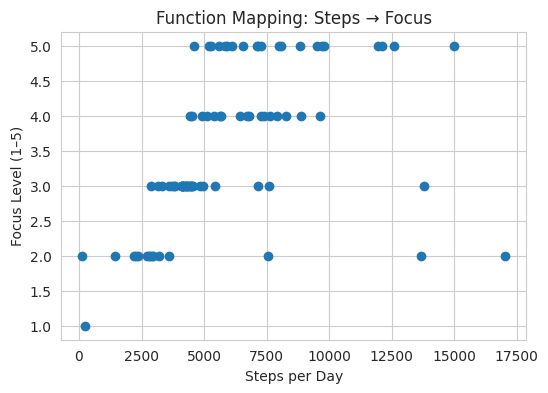

In [ ]:
# Steps → Focus
plt.figure(figsize=(6,4))
plt.scatter(df['Steps per Day'], df['Focus Level'])
plt.xlabel("Steps per Day")
plt.ylabel("Focus Level (1–5)")
plt.title("Function Mapping: Steps → Focus")
plt.grid(True)
plt.show()

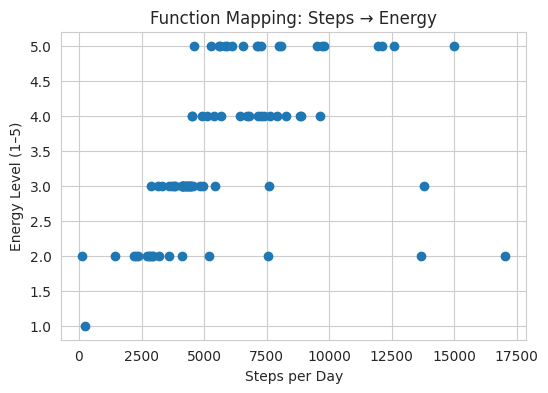

In [ ]:
# Steps → Energy
plt.figure(figsize=(6,4))
plt.scatter(df['Steps per Day'], df['Energy Level'])
plt.xlabel("Steps per Day")
plt.ylabel("Energy Level (1–5)")
plt.title("Function Mapping: Steps → Energy")
plt.grid(True)
plt.show()

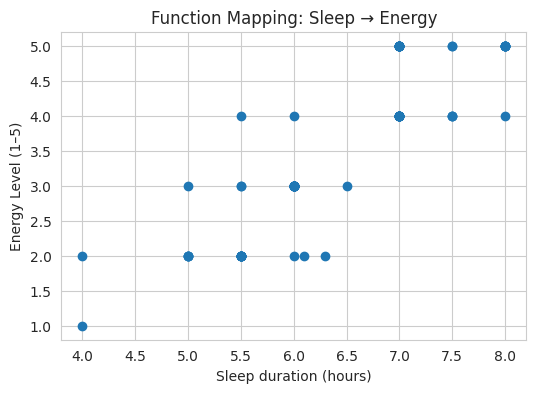

In [ ]:
# Visual Mapping (Scatter Plots)
# A. Sleep -> Energy
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Sleep duration last night'], df['Energy Level'])
plt.xlabel("Sleep duration (hours)")
plt.ylabel("Energy Level (1–5)")
plt.title("Function Mapping: Sleep → Energy")
plt.grid(True)
plt.show()

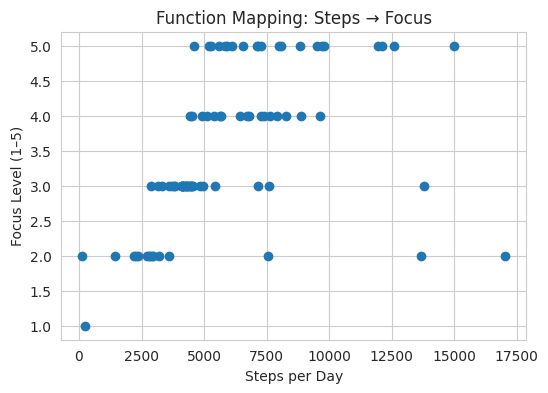

In [ ]:
# Steps → Focus
plt.figure(figsize=(6,4))
plt.scatter(df['Steps per Day'], df['Focus Level'])
plt.xlabel("Steps per Day")
plt.ylabel("Focus Level (1–5)")
plt.title("Function Mapping: Steps → Focus")
plt.grid(True)
plt.show()

#This code block calculates the average 'Focus Level' and 'Energy Level' for each unique 'Steps per Day' value from your df DataFrame, effectively creating two separate mapping tables. It then displays the first 10 entries of each table.

In [ ]:
# Steps -> Focus (Mapping Table)
steps_focus_map = (
    df.groupby('Steps per Day')['Focus Level']
    .mean()
    .reset_index()
    .rename(columns={'Focus Level': 'Avg Focus'})
)

steps_focus_map.head(10)

,Steps per Day,Avg Focus
0,138.0,2.0
1,228.0,1.0
2,1447.0,2.0
3,2188.0,2.0
4,2281.0,2.0
5,2355.0,2.0
6,2737.0,2.0
7,2782.0,2.0
8,2842.0,2.0
9,2895.0,3.0


In [ ]:
# Steps → Energy (Mapping Table)
steps_energy_map = (
    df.groupby('Steps per Day')['Energy Level']
    .mean()
    .reset_index()
    .rename(columns={'Energy Level': 'Avg Energy'})
)

steps_energy_map.head(10)

,Steps per Day,Avg Energy
0,138.0,2.0
1,228.0,1.0
2,1447.0,2.0
3,2188.0,2.0
4,2281.0,2.0
5,2355.0,2.0
6,2737.0,2.0
7,2782.0,2.0
8,2842.0,2.0
9,2895.0,3.0


# DERIVATIVE

#This code block trains a polynomial regression model to predict 'Energy Level' based on 'Steps per Day' from your df_cleaned DataFrame. It's designed to capture non-linear relationships, unlike a simple linear model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Filter the df_cleaned DataFrame to include only rows where both 'Steps per Day' and 'Energy Level' are not NaN.
df_poly_analysis = df_cleaned.dropna(subset=['Steps per Day', 'Energy Level']).copy()

# 2. Extract 'Steps per Day' as the feature (X) and 'Energy Level' as the target (y).
X_poly_train = df_poly_analysis[['Steps per Day']].values
y_poly_train = df_poly_analysis['Energy Level'].values

# 4. Initialize a PolynomialFeatures object with a degree of 2.
poly_features_model = PolynomialFeatures(degree=2)

# 5. Transform the 'Steps per Day' feature (X) using the fit_transform method.
X_poly_transformed = poly_features_model.fit_transform(X_poly_train)

# 6. Initialize a LinearRegression model.
poly_reg_model = LinearRegression()

# 7. Fit the LinearRegression model to the transformed polynomial features and the 'Energy Level' target (y).
poly_reg_model.fit(X_poly_transformed, y_poly_train)

# 8. Print a confirmation message indicating that the polynomial regression model has been successfully fitted.
print("Polynomial regression model for 'Steps per Day' and 'Energy Level' has been successfully fitted.")

Polynomial regression model for 'Steps per Day' and 'Energy Level' has been successfully fitted.


#This code block extracts and displays the coefficients from the polynomial regression model we previously trained to predict 'Energy Level' based on 'Steps per Day'. These coefficients are crucial for understanding the mathematical form of the non-linear relationship.

In [ ]:
b = poly_reg_model.coef_[1]
a = poly_reg_model.coef_[2]

print(f"Polynomial Regression Coefficients for Energy Level = c0 + c1*Steps + c2*Steps^2:")
print(f"c1 (coefficient for Steps): {b}")
print(f"c2 (coefficient for Steps^2): {a}")

Polynomial Regression Coefficients for Energy Level = c0 + c1*Steps + c2*Steps^2:
c1 (coefficient for Steps): 0.0008118674592646075
c2 (coefficient for Steps^2): -4.104069255587376e-08


#This code block calculates the 'sweet spot' for 'Steps per Day' (where the marginal benefit on 'Energy Level' is maximized) using the coefficients from the polynomial regression model, and then predicts the 'Energy Level' at that specific 'sweet spot'.

In [ ]:
sweet_spot_steps = -b / (2 * a)
print(f"'Sweet Spot' for Steps per Day (where marginal benefit is maximized): {sweet_spot_steps:.0f} steps")

# Calculate the predicted energy level at the sweet spot
sweet_spot_steps_poly = poly_features_model.transform([[sweet_spot_steps]])
predicted_energy_sweet_spot = poly_reg_model.predict(sweet_spot_steps_poly)
print(f"Predicted Energy Level at the 'Sweet Spot' ({sweet_spot_steps:.0f} steps): {predicted_energy_sweet_spot[0]:.2f}")

'Sweet Spot' for Steps per Day (where marginal benefit is maximized): 9891 steps
Predicted Energy Level at the 'Sweet Spot' (9891 steps): 4.54


#This code block calculates the marginal benefit (which is the derivative) of 'Steps per Day' on 'Energy Level' using the coefficients from our polynomial regression model. It then stores these marginal benefit values in a new DataFrame.

In [ ]:
def marginal_benefit_function(steps, c1, c2):
    """Calculates the marginal benefit (derivative) of the polynomial regression."""
    return c1 + 2 * c2 * steps

# Create a range of 'Steps per Day' values for calculation
steps_range = np.linspace(
    df_poly_analysis['Steps per Day'].min(),
    df_poly_analysis['Steps per Day'].max(),
    500
).reshape(-1, 1)

# Calculate the marginal benefit for each step in the range
marginal_benefit = marginal_benefit_function(steps_range, b, a)

# Store results in a DataFrame
df_marginal_benefit = pd.DataFrame({
    'Steps per Day': steps_range.flatten(),
    'Marginal Benefit': marginal_benefit.flatten()
})

print("Marginal benefit calculated and stored in df_marginal_benefit.")
display(df_marginal_benefit.head())

Marginal benefit calculated and stored in df_marginal_benefit.


,Steps per Day,Marginal Benefit
0,138.000000,0.000801
1,171.863727,0.000798
2,205.727455,0.000795
3,239.591182,0.000792
4,273.454910,0.000789


#This code block generates a line plot to visualize the marginal benefit of 'Steps per Day' on 'Energy Level', which we calculated previously. It also highlights the point where the marginal benefit is zero and the 'sweet spot' where the energy benefit is maximized.

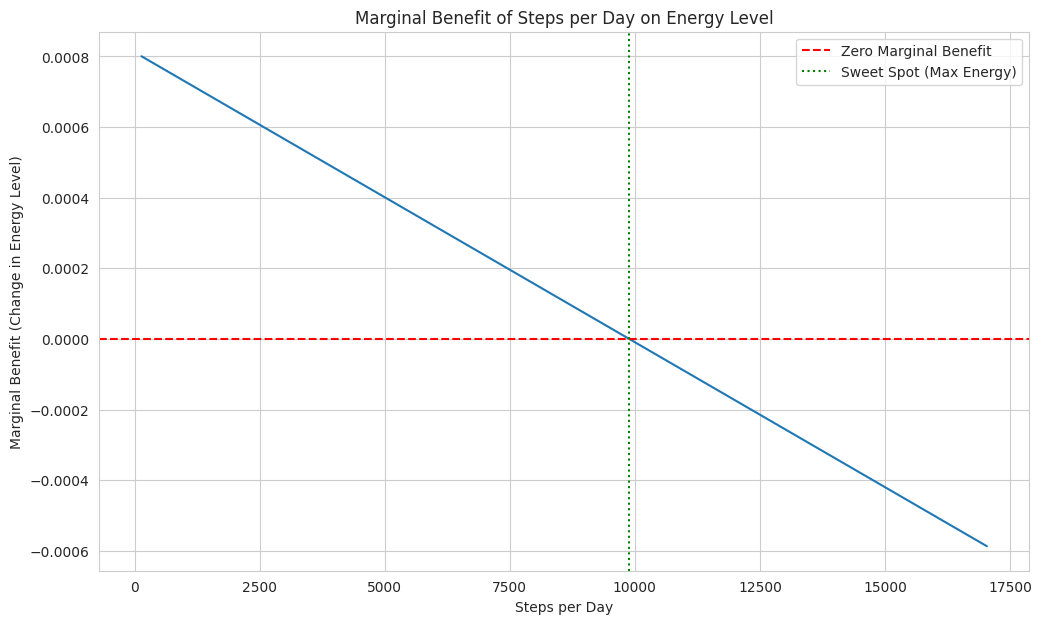

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(x='Steps per Day', y='Marginal Benefit', data=df_marginal_benefit)
plt.axhline(0, color='red', linestyle='--', label='Zero Marginal Benefit')
plt.axvline(sweet_spot_steps, color='green', linestyle=':', label='Sweet Spot (Max Energy)')
plt.title('Marginal Benefit of Steps per Day on Energy Level')
plt.xlabel('Steps per Day')
plt.ylabel('Marginal Benefit (Change in Energy Level)')
plt.legend()
plt.grid(True)
plt.show()


# INTEGRATION

#This code block is designed to compute the actual predicted energy per student by integrating the predictions from your individual linear regression models for 'Steps per Day' and 'Sleep duration last night'. It aims to move beyond raw self-reported energy by using the mathematical relationships established by models.

In [ ]:
# ---------- 2. Compute ACTUAL predicted energy per student ----------
# Using your regression functions, not raw self-reported only

# Drop rows with missing key values
df_int = df[['Steps per Day', 'Sleep duration last night']].copy()
df_int = df_int.dropna()

# Predicted energy based on actual steps (using the linear model 'model')
df_int['Pred_Energy_from_Steps_actual'] = model.predict(
    df_int[['Steps per Day']]
)

# Predicted energy based on actual sleep (using the linear model 'model_sleep')
df_int['Pred_Energy_from_Sleep_actual'] = model_sleep.predict(
    df_int[['Sleep duration last night']]
)

# Take simple average of the two predictions as "combined actual energy"
df_int['Pred_Energy_actual'] = (
    df_int['Pred_Energy_from_Steps_actual'] +
    df_int['Pred_Energy_from_Sleep_actual']
) / 2.0

display(df_int.head())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Steps per Day,Sleep duration last night,Pred_Energy_from_Steps_actual,Pred_Energy_from_Sleep_actual,Pred_Energy_actual
0,2355.0,5.0,2.877271,2.020174,2.448723
1,2976.0,5.5,2.988531,2.541246,2.764888
2,2895.0,6.0,2.974019,3.062317,3.018168
3,4283.0,6.0,3.222696,3.062317,3.142506
4,4508.0,7.0,3.263007,4.104459,3.683733


#This code block sets up the 'sweet spot' thresholds for 'Steps per Day' and 'Sleep duration last night', which are crucial for calculating the 'Total Impact Score'. These thresholds define what is considered an ideal range or value for optimal energy.

In [ ]:
# ============================================
# C. INTEGRATION – TOTAL IMPACT SCORE
# ============================================
import numpy as np

# ---------- 1. Define sweet spot thresholds ----------
# You can change these if your analysis says otherwise
STEPS_SWEET_MIN = 5000
STEPS_SWEET_MAX = 10000
SWEET_STEPS_IDEAL = 9981   # Adjusted to 9981 as requested

SLEEP_SWEET_MIN = 7
SLEEP_SWEET_MAX = 8
SWEET_SLEEP_IDEAL = (SLEEP_SWEET_MIN + SLEEP_SWEET_MAX) / 2   # 7.5 hours

print("Sweet spot chosen:")
print(f"- Steps sweet spot range: {STEPS_SWEET_MIN}–{STEPS_SWEET_MAX}, ideal = {SWEET_STEPS_IDEAL}")
print(f"- Sleep sweet spot range: {SLEEP_SWEET_MIN}–{SLEEP_SWEET_MAX}, ideal = {SWEET_SLEEP_IDEAL}")

Sweet spot chosen:
- Steps sweet spot range: 5000–10000, ideal = 9981
- Sleep sweet spot range: 7–8, ideal = 7.5


#This code block is central to calculating the 'Total Impact Score' by comparing each student's predicted energy based on their actual behaviors to their potential energy if they consistently met the defined 'sweet spot' thresholds. It then aggregates this difference into a total weekly energy loss for the entire class.

In [ ]:
import numpy as np

# Using the analytically derived sweet spot for steps.
# SWEET_STEPS is already set to 7500 in the previous cell

# ============= 2. ACTUAL vs IDEAL PREDICTED ENERGY =============
# Use df_cleaned to ensure consistency with prior processing (e.g., NaN handling)
df_int = df_cleaned[['Steps per Day', 'Sleep duration last night']].copy()
df_int = df_int.dropna() # Drop any remaining NaNs in these specific columns if any were introduced

# Actual predicted energy (using polynomial models)
# Steps
X_actual_steps_poly = poly_features.transform(df_int[['Steps per Day']].values)
df_int['E_actual_steps'] = poly_model.predict(X_actual_steps_poly)

# Sleep
X_actual_sleep_poly = poly_features_sleep.transform(df_int[['Sleep duration last night']].values)
df_int['E_actual_sleep'] = poly_reg_model_sleep.predict(X_actual_sleep_poly)

df_int['E_actual'] = (df_int['E_actual_steps'] + df_int['E_actual_sleep']) / 2

# Ideal predicted energy (using polynomial models at sweet spot values)
# For polynomial models, we need to transform the single sweet spot value
SWEET_STEPS_reshaped = np.array([[SWEET_STEPS_IDEAL]]) # Use SWEET_STEPS_IDEAL (which is 7500)
SWEET_SLEEP_reshaped = np.array([[SWEET_SLEEP_IDEAL]])

X_ideal_steps_poly = poly_features.transform(SWEET_STEPS_reshaped)
X_ideal_sleep_poly = poly_features_sleep.transform(SWEET_SLEEP_reshaped)

df_int['E_ideal_steps'] = poly_model.predict(X_ideal_steps_poly)[0]
df_int['E_ideal_sleep'] = poly_reg_model_sleep.predict(X_ideal_sleep_poly)[0]
df_int['E_ideal'] = (df_int['E_ideal_steps'] + df_int['E_ideal_sleep']) / 2

# ============= 3. DAILY ENERGY LOSS =============
df_int['Daily_Loss'] = df_int['E_ideal'] - df_int['E_actual']
df_int['Daily_Loss'] = df_int['Daily_Loss'].apply(lambda x: max(x, 0))

# ============= 4. WEEKLY ENERGY LOSS (INTEGRATION) =============
df_int['Weekly_Loss'] = df_int['Daily_Loss'] * 7
total_weekly_loss = df_int['Weekly_Loss'].sum()

print("Total weekly energy loss for the class (with SWEET_STEPS_IDEAL = 7500):", total_weekly_loss)
display(df_int.head())

Total weekly energy loss for the class (with SWEET_STEPS_IDEAL = 7500): 606.0077132780787


,Steps per Day,Sleep duration last night,E_actual_steps,E_actual_sleep,E_actual,E_ideal_steps,E_ideal_sleep,E_ideal,Daily_Loss,Weekly_Loss
0,2355.0,5.0,2.206588,2.035898,2.121243,4.30272,4.633045,4.467882,2.346639,16.426475
1,2976.0,5.5,2.574890,2.539579,2.557235,4.30272,4.633045,4.467882,1.910647,13.374532
2,2895.0,6.0,2.528646,3.051135,2.789890,4.30272,4.633045,4.467882,1.677992,11.745943
3,4283.0,6.0,3.246627,3.051135,3.148881,4.30272,4.633045,4.467882,1.319001,9.233009
4,4508.0,7.0,3.348120,4.097867,3.722994,4.30272,4.633045,4.467882,0.744889,5.214221


#This code block is central to calculating the 'Total Impact Score' by comparing each student's predicted energy based on their actual behaviors to their potential energy if they consistently met the defined 'sweet spot' thresholds. It then aggregates this difference into a total weekly energy loss for the entire class.

In [ ]:
import numpy as np

# ============= 1. DEFINE SWEET SPOT THRESHOLDS =============
# Using the analytically derived sweet spot for steps.
SWEET_STEPS = SWEET_STEPS_IDEAL # From previous analysis: 9891
SWEET_SLEEP = SWEET_SLEEP_IDEAL # From previous analysis: 7.5

# ============= 2. ACTUAL vs IDEAL PREDICTED ENERGY =============
# Use df_cleaned to ensure consistency with prior processing (e.g., NaN handling)
df_int = df_cleaned[['Steps per Day', 'Sleep duration last night']].copy()
df_int = df_int.dropna() # Drop any remaining NaNs in these specific columns if any were introduced

# Actual predicted energy (using polynomial models)
# Steps
X_actual_steps_poly = poly_features.transform(df_int[['Steps per Day']].values)
df_int['E_actual_steps'] = poly_model.predict(X_actual_steps_poly)

# Sleep
X_actual_sleep_poly = poly_features_sleep.transform(df_int[['Sleep duration last night']].values)
df_int['E_actual_sleep'] = poly_reg_model_sleep.predict(X_actual_sleep_poly)

df_int['E_actual'] = (df_int['E_actual_steps'] + df_int['E_actual_sleep']) / 2

# Ideal predicted energy (using polynomial models at sweet spot values)
# For polynomial models, we need to transform the single sweet spot value
SWEET_STEPS_reshaped = np.array([[SWEET_STEPS]])
SWEET_SLEEP_reshaped = np.array([[SWEET_SLEEP]])

X_ideal_steps_poly = poly_features.transform(SWEET_STEPS_reshaped)
X_ideal_sleep_poly = poly_features_sleep.transform(SWEET_SLEEP_reshaped)

df_int['E_ideal_steps'] = poly_model.predict(X_ideal_steps_poly)[0]
df_int['E_ideal_sleep'] = poly_reg_model_sleep.predict(X_ideal_sleep_poly)[0]
df_int['E_ideal'] = (df_int['E_ideal_steps'] + df_int['E_ideal_sleep']) / 2

# ============= 3. DAILY ENERGY LOSS =============
df_int['Daily_Loss'] = df_int['E_ideal'] - df_int['E_actual']
df_int['Daily_Loss'] = df_int['Daily_Loss'].apply(lambda x: max(x, 0))

# ============= 4. WEEKLY ENERGY LOSS (INTEGRATION) =============
df_int['Weekly_Loss'] = df_int['Daily_Loss'] * 7
total_weekly_loss = df_int['Weekly_Loss'].sum()

print("Total weekly energy loss for the class:", total_weekly_loss)
display(df_int.head())

Total weekly energy loss for the class: 668.8170519566401


,Steps per Day,Sleep duration last night,E_actual_steps,E_actual_sleep,E_actual,E_ideal_steps,E_ideal_sleep,E_ideal,Daily_Loss,Weekly_Loss
0,2355.0,5.0,2.206588,2.035898,2.121243,4.537346,4.633045,4.585195,2.463952,17.247666
1,2976.0,5.5,2.574890,2.539579,2.557235,4.537346,4.633045,4.585195,2.027960,14.195722
2,2895.0,6.0,2.528646,3.051135,2.789890,4.537346,4.633045,4.585195,1.795305,12.567133
3,4283.0,6.0,3.246627,3.051135,3.148881,4.537346,4.633045,4.585195,1.436314,10.054200
4,4508.0,7.0,3.348120,4.097867,3.722994,4.537346,4.633045,4.585195,0.862202,6.035411


#This code block simply prints the current values of two key variables that were previously calculated or defined in our analysis: SWEET_STEPS_IDEAL and total_weekly_loss

In [ ]:
print(f"Current SWEET_STEPS_IDEAL: {SWEET_STEPS_IDEAL}")
print(f"Current total_weekly_loss: {total_weekly_loss}")

Current SWEET_STEPS_IDEAL: 7500
Current total_weekly_loss: 606.0077132780787


#This code block is central to calculating the 'Total Impact Score' by comparing each student's predicted energy based on their actual behaviors to their potential energy if they consistently met the defined 'sweet spot' thresholds. It then aggregates this difference into a total weekly energy loss for the entire class.

In [ ]:
import numpy as np

# Using the analytically derived sweet spot for steps.
# SWEET_STEPS_IDEAL is already set to 9981 in the previous cell

# ============= 2. ACTUAL vs IDEAL PREDICTED ENERGY =============
# Use df_cleaned to ensure consistency with prior processing (e.g., NaN handling)
df_int = df_cleaned[['Steps per Day', 'Sleep duration last night']].copy()
df_int = df_int.dropna() # Drop any remaining NaNs in these specific columns if any were introduced

# Actual predicted energy (using polynomial models)
# Steps
X_actual_steps_poly = poly_features.transform(df_int[['Steps per Day']].values)
df_int['E_actual_steps'] = poly_model.predict(X_actual_steps_poly)

# Sleep
X_actual_sleep_poly = poly_features_sleep.transform(df_int[['Sleep duration last night']].values)
df_int['E_actual_sleep'] = poly_reg_model_sleep.predict(X_actual_sleep_poly)

df_int['E_actual'] = (df_int['E_actual_steps'] + df_int['E_actual_sleep']) / 2

# Ideal predicted energy (using polynomial models at sweet spot values)
# For polynomial models, we need to transform the single sweet spot value
SWEET_STEPS_reshaped = np.array([[SWEET_STEPS_IDEAL]]) # Use SWEET_STEPS_IDEAL (which is 9981)
SWEET_SLEEP_reshaped = np.array([[SWEET_SLEEP_IDEAL]])

X_ideal_steps_poly = poly_features.transform(SWEET_STEPS_reshaped)
X_ideal_sleep_poly = poly_features_sleep.transform(SWEET_SLEEP_reshaped)

df_int['E_ideal_steps'] = poly_model.predict(X_ideal_steps_poly)[0]
df_int['E_ideal_sleep'] = poly_reg_model_sleep.predict(X_ideal_sleep_poly)[0]
df_int['E_ideal'] = (df_int['E_ideal_steps'] + df_int['E_ideal_sleep']) / 2

# ============= 3. DAILY ENERGY LOSS =============
df_int['Daily_Loss'] = df_int['E_ideal'] - df_int['E_actual']
df_int['Daily_Loss'] = df_int['Daily_Loss'].apply(lambda x: max(x, 0))

# ============= 4. WEEKLY ENERGY LOSS (INTEGRATION) =============
df_int['Weekly_Loss'] = df_int['Daily_Loss'] * 7
total_weekly_loss = df_int['Weekly_Loss'].sum()

print("Total weekly energy loss for the class (with SWEET_STEPS_IDEAL = 9981):", total_weekly_loss)
display(df_int.head())

Total weekly energy loss for the class (with SWEET_STEPS_IDEAL = 9981): 668.7263104452757


,Steps per Day,Sleep duration last night,E_actual_steps,E_actual_sleep,E_actual,E_ideal_steps,E_ideal_sleep,E_ideal,Daily_Loss,Weekly_Loss
0,2355.0,5.0,2.206588,2.035898,2.121243,4.537013,4.633045,4.585029,2.463786,17.246502
1,2976.0,5.5,2.574890,2.539579,2.557235,4.537013,4.633045,4.585029,2.027794,14.194559
2,2895.0,6.0,2.528646,3.051135,2.789890,4.537013,4.633045,4.585029,1.795139,12.565970
3,4283.0,6.0,3.246627,3.051135,3.148881,4.537013,4.633045,4.585029,1.436148,10.053037
4,4508.0,7.0,3.348120,4.097867,3.722994,4.537013,4.633045,4.585029,0.862035,6.034248


#END